**Task 5 - To explore Business Analytics(Exploratory Data Analysis)**

In [1]:
import pandas as pd

In [2]:
#Download the dataset
url = "https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

#Explore the dataset
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
type(data)

pandas.core.frame.DataFrame

**Cleaning the data**

In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.describe(include= "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [10]:
data.Profit.value_counts()

 0.0000      65
 6.2208      43
 9.3312      38
 5.4432      32
 3.6288      32
             ..
-3.5622       1
-7.4800       1
 626.1850     1
-12.8392      1
 6.1704       1
Name: Profit, Length: 7287, dtype: int64

**Sorting the Data Columns**

In [11]:
for i in data.columns:
    if data[i].dtypes== 'object':
        print('column:' , i)
        print(data[i].value_counts())
        print("------------------")

column: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
------------------
column: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
------------------
column: Country
United States    9994
Name: Country, dtype: int64
------------------
column: City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Champaign          1
Yucaipa            1
Bartlett           1
Holyoke            1
Chapel Hill        1
Name: City, Length: 531, dtype: int64
------------------
column: State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224

**Finding outliers from target column and removing them**

In [13]:
 import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

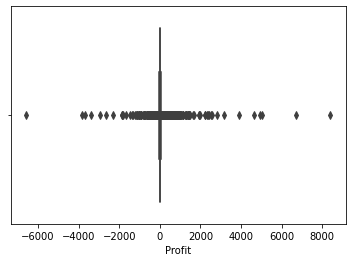

In [14]:
sns.boxplot(data.Profit)

In [15]:
def remove_outliers(df,    col,    k=2):   
    mean = df[col].mean()
    global data1      
    sd = df[col].std()    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]       
    data1 = df.loc[df[col].isin(final_list)]

In [17]:
remove_outliers(data,'Profit',k=2)

**Extreme values are removed in order to assess the profit data correctly**

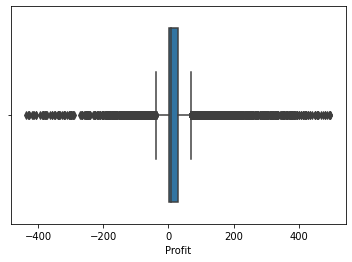

In [18]:
sns.boxplot(data1.Profit)

In [19]:
data1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Renaming columns to avoid errors in future**

In [20]:
data1.rename(columns={'Ship Mode':'Ship_Mode',
                   'Postal Code': 'Postal_Code',
                     'Sub-Category': 'Sub_Category'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Effect of shipping mode on profit**

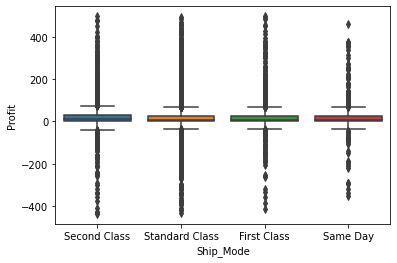

In [22]:
sns.boxplot( x= "Ship_Mode" , y= "Profit", data = data1)

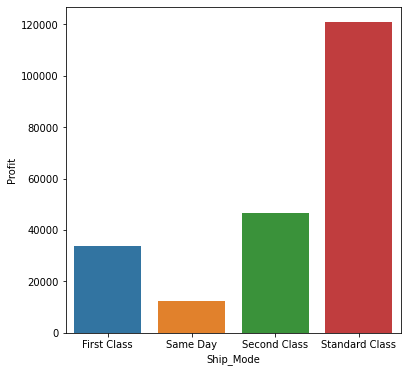

In [23]:
bp = data1.groupby(['Ship_Mode'], as_index=False ) ['Profit'].sum()
plt.figure(figsize = (6,6))
sns.barplot(bp['Ship_Mode'] , bp['Profit'])

**Showing effects of categories in shipping mode on profit**

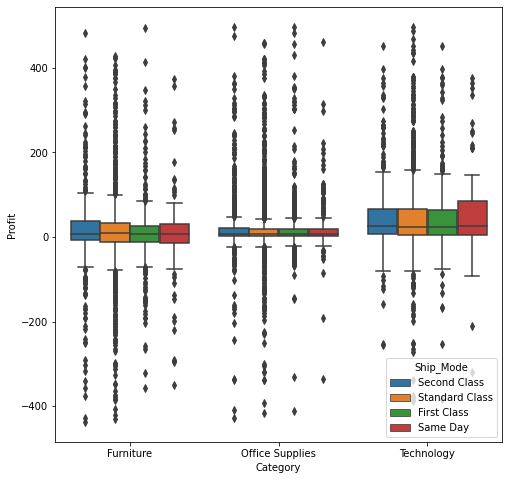

In [24]:
plt.figure(figsize= (8  , 8 ))
sns.boxplot(x= "Category", y= "Profit", data= data1, hue= "Ship_Mode")

**Showing effect of shipping mode on Sales of the firm**

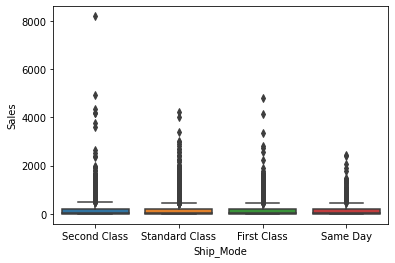

In [25]:
sns.boxplot( x= "Ship_Mode" , y= "Sales", data = data1)

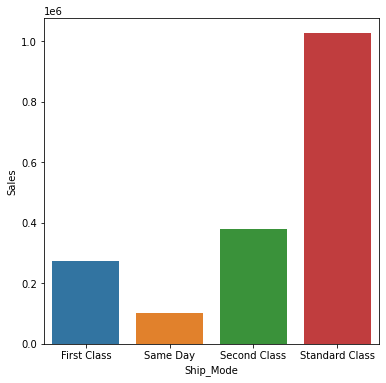

In [26]:
bp = data1.groupby(['Ship_Mode'], as_index=False ) ['Sales'].sum()
plt.figure(figsize = (6,6))
sns.barplot(bp['Ship_Mode'] , bp['Sales'])

**Visualising how the sales are effected by different categories in shipping mode**

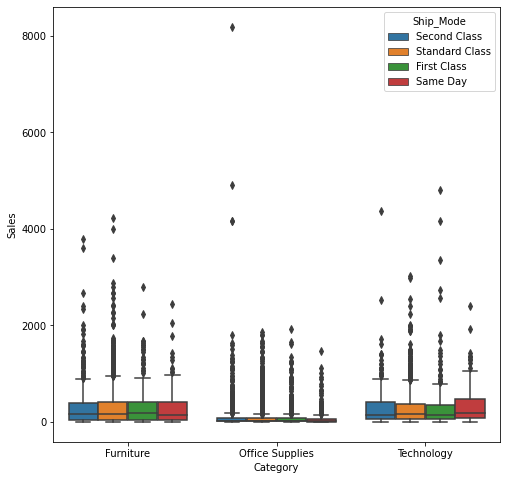

In [27]:
plt.figure(figsize= (8  , 8 ))
sns.boxplot(x= "Category", y= "Sales", data= data1, hue= "Ship_Mode")

**Bar plot showing the amount of profit due to ship mode**

Text(0.5, 1.0, 'Profit due to Shipping Mode')

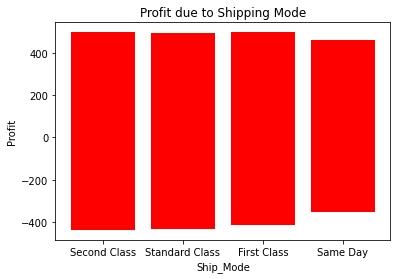

In [28]:
plt.bar(data1.Ship_Mode , data1.Profit  ,  color = 'r' )
plt.xlabel('Ship_Mode')
plt.ylabel('Profit')
plt.title("Profit due to Shipping Mode")

**Scattering effect of ship mode on profit**

Text(0.5, 1.0, 'Ship_Mode Vs Profit')

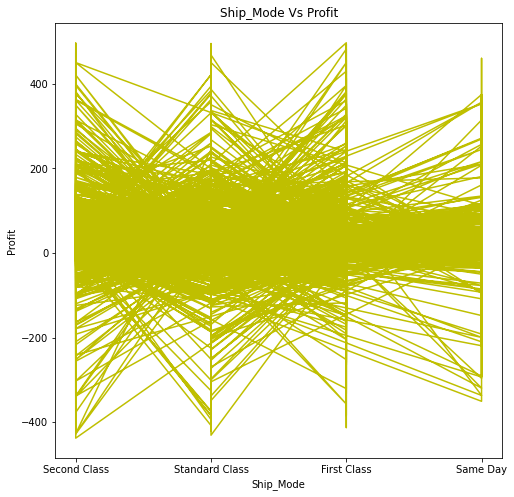

In [29]:
plt.figure(figsize= (8  , 8 ))
plt.plot( data1.Ship_Mode , data1.Profit , color  = "y")
plt.xlabel("Ship_Mode")
plt.ylabel("Profit")
plt.title("Ship_Mode Vs Profit")

**Grouping the data into specific columns to show their effects and contributions on the sales and profits of the firm**

In [30]:
data1.groupby(['Segment'], as_index=False ) ['Sales','Profit'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Segment,Sales,Profit
0,Consumer,910308.8070,104107.5623
1,Corporate,558791.1098,66671.3232
2,Home Office,312449.8375,42792.7266


In [31]:
data1.groupby(['State'], as_index=False ) ['Sales','Profit'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,Sales,Profit
0,Alabama,15150.6800,3799.6413
1,Arizona,31109.0370,-530.2763
2,Arkansas,9884.1500,3165.5165
3,California,415973.8675,63336.4645
4,Colorado,27536.9150,-937.2859
5,Connecticut,13384.3570,3511.4918
6,Delaware,14016.7690,4145.1201
7,District of Columbia,1485.1000,411.0269
8,Florida,64556.4810,-98.5380
9,Georgia,32839.0500,8967.9596


In [32]:
data1.groupby(['City'], as_index=False ) ['Sales','Profit'].sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,City,Sales,Profit
0,Aberdeen,25.500,6.6300
1,Abilene,1.392,-3.7584
2,Akron,2729.986,-186.6356
3,Albuquerque,2220.160,634.0881
4,Alexandria,5519.570,318.6183
...,...,...,...
526,Woonsocket,195.550,78.6791
527,Yonkers,2757.736,366.7900
528,York,817.978,-102.1692
529,Yucaipa,50.800,13.2080


In [33]:
data1.groupby(['Category','Sub_Category'], as_index=False ) ['Sales','Profit'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sub_Category,Sales,Profit
0,Furniture,Bookcases,106801.6083,-2033.8868
1,Furniture,Chairs,299383.6200,20937.2780
2,Furniture,Furnishings,91705.1640,13059.1436
3,Furniture,Tables,176692.8100,-7360.0829
4,Office Supplies,Appliances,87009.2110,15687.5662
5,Office Supplies,Art,27118.7920,6527.7870
6,Office Supplies,Binders,90320.5650,16454.4281
7,Office Supplies,Envelopes,16476.4020,6964.1767
8,Office Supplies,Fasteners,3024.2800,949.5182
9,Office Supplies,Labels,12486.3120,5546.2540


**Distribution of profit over bins for histogram**

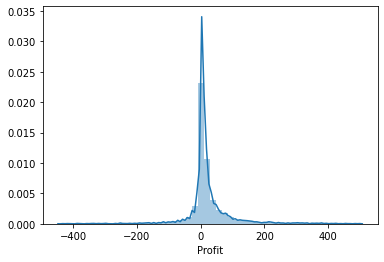

In [34]:
sns.distplot(data1.Profit)

**Building histograms of all numerical type columns to get the generic idea of the data**

In [35]:
data1_num = data1.select_dtypes(include = ['float64', 'int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76c39d09e8>,
      dtype=object)

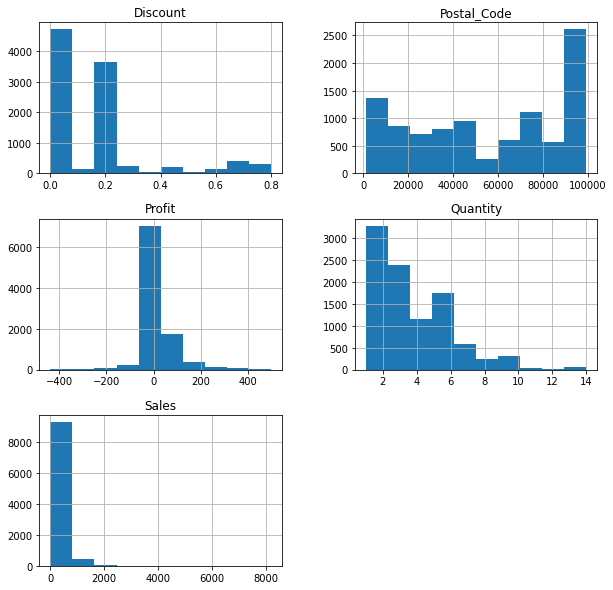

In [36]:
data1_num.hist(figsize= (10,10))

**Building scatter plot to show that how is profit get affected by sales,quantity and discount.**

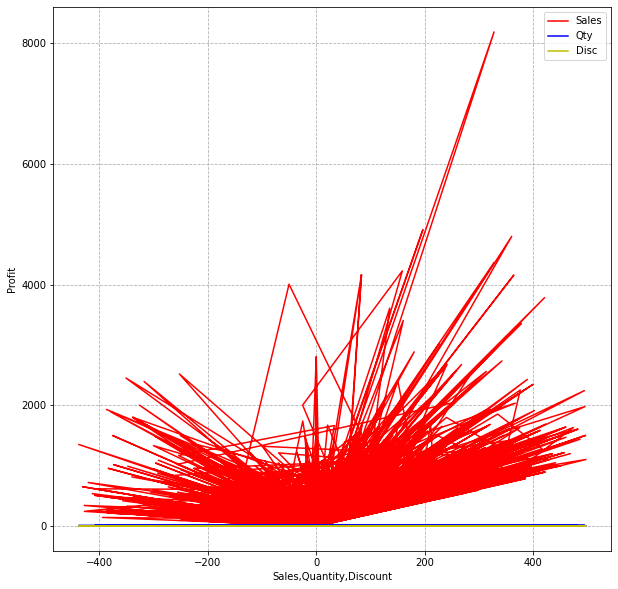

In [37]:
plt.figure(figsize= (10  , 10 ))
plt.plot(data1.Profit , data1.Sales , color = 'r' , label = "Sales" ) 
plt.plot(data1.Profit , data1.Quantity , color = 'b' , label = "Qty" )
plt.plot(data1.Profit , data1.Discount , color = 'y' , label = "Disc" )
plt.xlabel("Sales,Quantity,Discount")
plt.ylabel('Profit')
plt.legend()
plt.grid(linestyle = "--")

**Building line plots to show the individual effects of sales, quantity and discount on profit level**

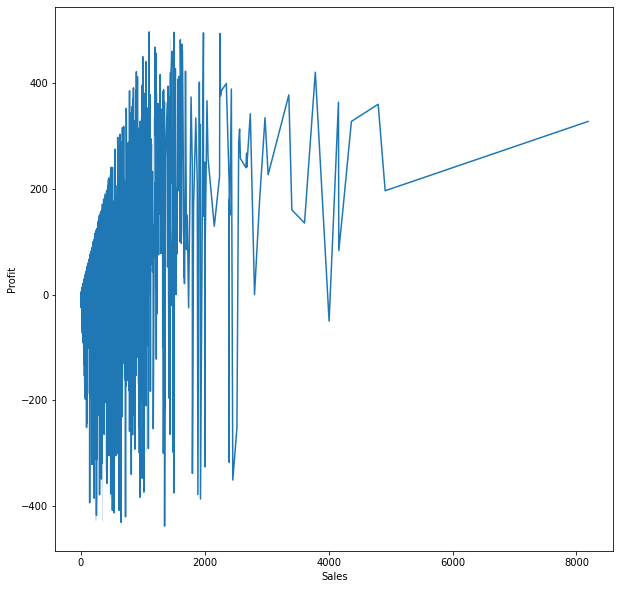

In [38]:
plt.figure(figsize= (10  , 10 ))
sns.lineplot(data1['Sales'] , data1['Profit'])

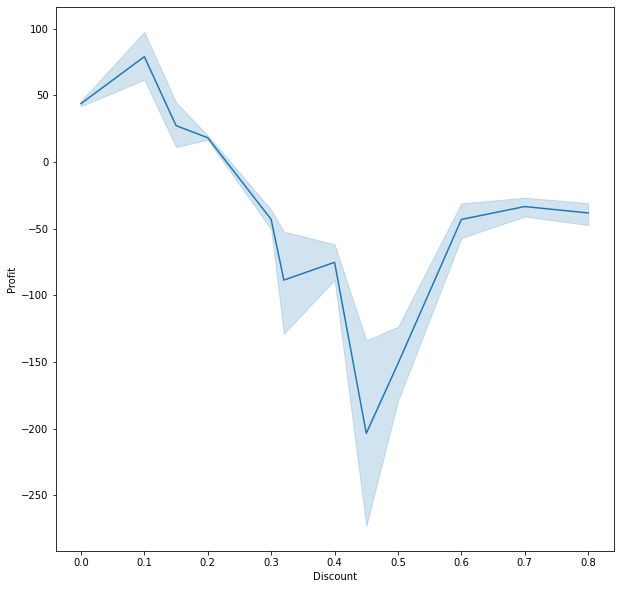

In [39]:
plt.figure(figsize= (10  , 10 ))
sns.lineplot(data1['Discount'] , data1['Profit'])

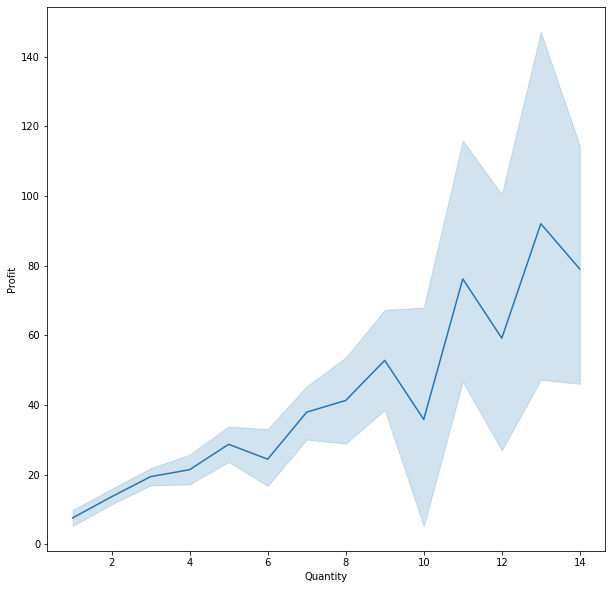

In [40]:
plt.figure(figsize= (10  , 10 ))
sns.lineplot(data1['Quantity'] , data1['Profit'])

**Determing profit levels for different regions**

In [41]:
data1.groupby(['Region'])['Profit'].mean()

Region
Central    11.423745
East       20.972398
South      26.853135
West       27.334673
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Average Profit Between Different Regions')

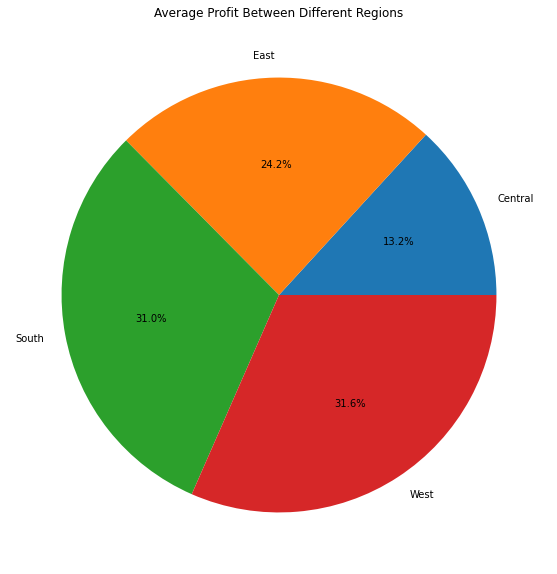

In [42]:
profit = (11.423, 20.972 , 26.853, 27.334)
regions = ('Central' , 'East' , 'South' , 'West')
plt.figure(figsize= (10  , 10 ))
plt.pie( profit , labels = regions  , autopct=     '%.1f%%'    )
plt.title("Average Profit Between Different Regions")

**Using scatter dots plotting, firm can find which postal code area has major share of profit**

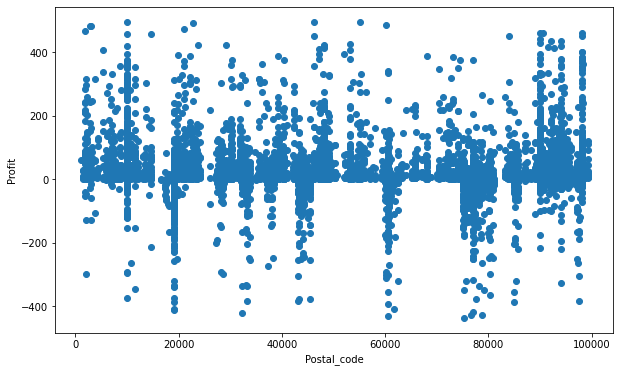

In [43]:
fig , ax = plt.subplots(figsize=(10,6))
ax.scatter(data1['Postal_Code'], data1['Profit'])
ax.set_xlabel('Postal_code')
ax.set_ylabel('Profit')
plt.show()

**Building a correltion matrix of the data and plotting it using a heatmap. This will summarise the firm's data.**

,Postal_Code,Sales,Quantity,Discount,Profit
Postal_Code,1.000000,0.013643,0.018810,0.056654,-0.031698
Sales,0.013643,1.000000,0.243961,-0.054206,0.447663
Quantity,0.018810,0.243961,1.000000,0.004763,0.145136
Discount,0.056654,-0.054206,0.004763,1.000000,-0.370784
Profit,-0.031698,0.447663,0.145136,-0.370784,1.000000


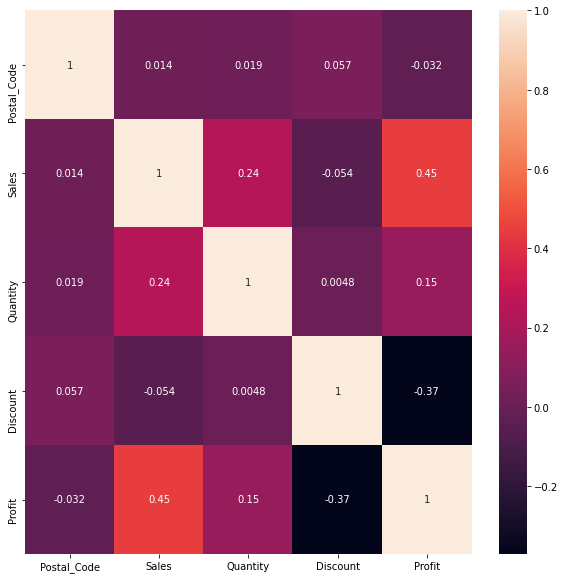

In [44]:
plt.figure(figsize= (10,10 ))
CM = data1.corr()
sns.heatmap(CM , annot= True )
CM

*The above heatmap shows the basic constraint relationship between the varibales which will help the company to take desicions and build future policies for it.*

**Using basic statistical methods to analyse company's performance by analysing profit**

In [45]:
import numpy as np

In [46]:
np.mean(data.Profit)           #without removing outliers

28.656896307784802

In [47]:
np.median(data.Profit)         #without removing outliers

8.6665

In [48]:
np.mean(data1.Profit)

21.759715955170673

In [50]:
np.median(data1.Profit)

8.502

In [51]:
np.std(data1.Profit)

74.08311634163834

In [52]:
np.cov(data1.Profit)

array(5488.86735943)

In [53]:
data1.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**CONCLUSION**

**After the completion of Exploratory Data analysis, few conclusions have been made about the firms's current situation and few points can be taken as a reference for future of the firm.**

**As seen above, profit is affected by every aspect of the company and every aspect has it's different point of view.**

**After using ship mode as reference, we find that standard class has more profit level than others. It also has highest value of sales.**

**After adding category feature to the ship mode we saw that standard class with technology has generated the highest amount of profit but class same day with technology has higest sales.**

**Consumer segment has generated highest sales and profit over the other two while home office segment has least.**

**In terms of state California has highest sales and profit generation while texas have lowest profit generation.**

**Phones in technology category has highest sales amount and profit while fasteners in office supplies has minimum sales generation but least profit is coming from tables from furniture.**

**In most cases it is clearly visible that more sales lead to more profit levels.**

**In discount varibale, profit level decreases at start but will increase later due to more sales.Profit is directly proportional to quantity as seen above in the graph.**

**Western region has generated more profit with 31.6% over others followed by south, east and central respectively.**

**After building correlation matrix, it is found that sales and quantity have positive correlation with profit while discount have a negative correlation.**

**Mean profit of the firm both before and after removing outliers is quite low with 28.65 and 21.75 respectively.But it is noted that firm is not running at loss.**